In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_thesis_datasetv2_rev.csv')

In [3]:
df.head()

,Age,Financial Status,Has a Laptop,Type of Internet Connection,CC100,CC101,CC102,CS111/IT112,English Prof,Reading Compre,...,GAS,HUMSS,STEM,Sports Track,TVL-HE,TVL-ICT,Female,Male,Prefer not to say,label
0,22,5,2,2,1.50,2.00,2.00,2.00,41.05,30.03,...,0,0,0,0,0,1,0,1,0,0
1,24,1,2,1,2.50,3.00,2.00,2.50,61.05,48.40,...,0,0,0,0,0,1,0,1,0,1
2,21,1,2,2,1.00,1.75,1.75,2.00,49.95,71.99,...,0,0,1,0,0,0,1,0,0,1
3,22,0,0,2,1.75,1.25,3.00,1.75,89.71,77.12,...,0,0,0,0,0,0,0,1,0,1
4,23,1,2,2,1.25,1.25,1.75,1.75,95.51,71.99,...,0,0,0,0,0,1,1,0,0,1


In [4]:
df.shape

(388, 26)

In [5]:
df.columns

Index(['Age', 'Financial Status', 'Has a Laptop',
       'Type of Internet Connection', 'CC100', 'CC101', 'CC102', 'CS111/IT112',
       'English Prof', 'Reading Compre', 'Science Process', 'Quantitative',
       'Abstract', 'CET OAPR', 'SHS/HS GPA', 'ABM/BAM', 'GAS', 'HUMSS', 'STEM',
       'Sports Track', 'TVL-HE', 'TVL-ICT', 'Female', 'Male',
       'Prefer not to say', 'label'],
      dtype='object')

In [6]:
features = df.columns[:25]
features

Index(['Age', 'Financial Status', 'Has a Laptop',
       'Type of Internet Connection', 'CC100', 'CC101', 'CC102', 'CS111/IT112',
       'English Prof', 'Reading Compre', 'Science Process', 'Quantitative',
       'Abstract', 'CET OAPR', 'SHS/HS GPA', 'ABM/BAM', 'GAS', 'HUMSS', 'STEM',
       'Sports Track', 'TVL-HE', 'TVL-ICT', 'Female', 'Male',
       'Prefer not to say'],
      dtype='object')

In [7]:
target = df.columns[-1:]
target

Index(['label'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


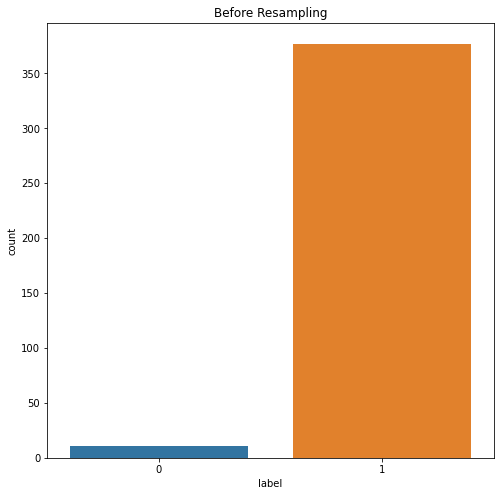

In [8]:
plt.figure(figsize=(8, 8))
sns.countplot(df['label'], data=df)
plt.title('Before Resampling')
plt.show()

In [9]:
df.label.value_counts()

1    377
0     11
Name: label, dtype: int64

# Training and Testing of dataset with 60:40 split of train and test data

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.5, random_state=42, stratify=df['label'])

In [11]:
# Load the dataset
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

#Balance dataset using SMOTE (Oversampling)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0,k_neighbors=4)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

#Balance dataset using RandomUndersampling (Undersampling)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [12]:
# describes info about train and test set
print('Imbalanced Train Data:')
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print('*********************************')
print('Oversampling Train Data:')
print("X_train dataset: ", X_train_smote.shape)
print("y_train dataset: ", y_train_smote.shape)
print('*********************************')
print('Undersampling Train Data:')
print("X_train dataset: ", X_train_rus.shape)
print("y_train dataset: ", y_train_rus.shape)
print('*********************************')
print('Test Data:')
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

Imbalanced Train Data:
X_train dataset:  (194, 25)
y_train dataset:  (194, 1)
*********************************
Oversampling Train Data:
X_train dataset:  (378, 25)
y_train dataset:  (378, 1)
*********************************
Undersampling Train Data:
X_train dataset:  (10, 25)
y_train dataset:  (10, 1)
*********************************
Test Data:
X_test dataset:  (194, 25)
y_test dataset:  (194, 1)


In [13]:
y_test.value_counts()

label
1        188
0          6
dtype: int64

## Spot Check Algorithms and Evaluation Metrics

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from numpy import mean
from numpy import std
import numpy as np
import math

### Include Stacking and Bagging Ensemble in building models

In [15]:
# get a stacking ensemble of models
def get_stacking():
    # base models for stacking ensemble
    base_models = [('rf', RandomForestClassifier(n_estimators=100)),
               ('lr', LogisticRegression(max_iter=400)),
               ('svml', SVC(kernel = 'linear')),
               ('svmp', SVC(kernel = 'poly')),
               ('nb', GaussianNB()),
               ('knn', KNeighborsClassifier(n_neighbors=3)),
               ('ann', MLPClassifier(random_state=1, max_iter=500)),
               ('dt', DecisionTreeClassifier())
              ]
    stack = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
    return stack

# define models
models = dict()
models['Random Forest'] = RandomForestClassifier(n_estimators=100)
models['Logistic Regression'] = LogisticRegression()
models['SVM linear'] = SVC(kernel = 'linear')
models['SVM poly'] = SVC(kernel = 'poly')
models['Naive Bayes'] = GaussianNB()
models['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=3)
models['Artificial Neural Network'] = MLPClassifier(random_state=1, max_iter=300)
models['Decision Tree'] = DecisionTreeClassifier()
models['stacking'] = get_stacking()
models['bagging'] = BaggingClassifier()

In [16]:
results = dict()
print('\n******************************************************')
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    predicted = model.predict(X_test)
    print('\nAlgorithm: ',name)
    res_cm = confusion_matrix(y_test, predicted)
    print('Confusion Matrix:\n',res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy:',res_acc)
    print(classification_report(y_test, predicted, digits=3))
    res_auc_roc_score = roc_auc_score(y_test, predicted)
    print('AUC-ROC Score: {:.3f}'.format(res_auc_roc_score))
    print('\n******************************************************')


******************************************************

Algorithm:  Random Forest
Confusion Matrix:
 [[  0   6]
 [  0 188]]
Accuracy: 0.9690721649484536
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         6
           1      0.969     1.000     0.984       188

    accuracy                          0.969       194
   macro avg      0.485     0.500     0.492       194
weighted avg      0.939     0.969     0.954       194

AUC-ROC Score: 0.500

******************************************************

Algorithm:  Logistic Regression
Confusion Matrix:
 [[  1   5]
 [  3 185]]
Accuracy: 0.9587628865979382
              precision    recall  f1-score   support

           0      0.250     0.167     0.200         6
           1      0.974     0.984     0.979       188

    accuracy                          0.959       194
   macro avg      0.612     0.575     0.589       194
weighted avg      0.951     0.959     0.955       194

AUC-ROC Sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\line


AUC-ROC Score: 0.581

******************************************************

Algorithm:  SVM poly
Confusion Matrix:
 [[  0   6]
 [  0 188]]
Accuracy: 0.9690721649484536
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         6
           1      0.969     1.000     0.984       188

    accuracy                          0.969       194
   macro avg      0.485     0.500     0.492       194
weighted avg      0.939     0.969     0.954       194

AUC-ROC Score: 0.500

******************************************************

Algorithm:  Naive Bayes
Confusion Matrix:
 [[  4   2]
 [149  39]]
Accuracy: 0.22164948453608246
              precision    recall  f1-score   support

           0      0.026     0.667     0.050         6
           1      0.951     0.207     0.341       188

    accuracy                          0.222       194
   macro avg      0.489     0.437     0.195       194
weighted avg      0.923     0.222     0.332       194

A

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr


Algorithm:  stacking
Confusion Matrix:
 [[  0   6]
 [  0 188]]
Accuracy: 0.9690721649484536
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         6
           1      0.969     1.000     0.984       188

    accuracy                          0.969       194
   macro avg      0.485     0.500     0.492       194
weighted avg      0.939     0.969     0.954       194

AUC-ROC Score: 0.500

******************************************************

Algorithm:  bagging
Confusion Matrix:
 [[  0   6]
 [  2 186]]
Accuracy: 0.9587628865979382
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         6
           1      0.969     0.989     0.979       188

    accuracy                          0.959       194
   macro avg      0.484     0.495     0.489       194
weighted avg      0.939     0.959     0.949       194

AUC-ROC Score: 0.495

******************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Resampling the trained data using Oversampling method (SMOTE)

### Include Stacking and Bagging Ensemble in building models

In [17]:
# get a stacking ensemble of models
def get_stacking():
    # base models for stacking ensemble
    base_models = [('rf', RandomForestClassifier(n_estimators=100)),
               ('lr', LogisticRegression(max_iter=400)),
               ('svml', SVC(kernel = 'linear')),
               ('svmp', SVC(kernel = 'poly')),
               ('nb', GaussianNB()),
               ('knn', KNeighborsClassifier(n_neighbors=3)),
               ('ann', MLPClassifier(random_state=1, max_iter=500)),
               ('dt', DecisionTreeClassifier())
              ]
    stack = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
    return stack

# define models
models_smote = dict()
models_smote['Random Forest'] = RandomForestClassifier(n_estimators=100)
models_smote['Logistic Regression'] = LogisticRegression()
models_smote['SVM linear'] = SVC(kernel = 'linear')
models_smote['SVM poly'] = SVC(kernel = 'poly')
models_smote['Naive Bayes'] = GaussianNB()
models_smote['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=3)
models_smote['Artificial Neural Network'] = MLPClassifier(random_state=1, max_iter=300)
models_smote['Decision Tree'] = DecisionTreeClassifier()
models_smote['stacking'] = get_stacking()
models_smote['bagging'] = BaggingClassifier()

In [18]:
results = dict()
print('\n******************************************************')
for name, model in models_smote.items():
    model.fit(X_train_smote, y_train_smote.values.ravel())
    predicted = model.predict(X_test)
    print('\nAlgorithm: ',name)
    res_cm = confusion_matrix(y_test, predicted)
    print('\n     Route 1')
    print('Confusion Matrix:\n',res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy:',res_acc)
    print(classification_report(y_test, predicted, digits=3))
    res_auc_roc_score = roc_auc_score(y_test, predicted)
    print('AUC-ROC Score: {:.3f}'.format(res_auc_roc_score))
    print('\n******************************************************')


******************************************************

Algorithm:  Random Forest

     Route 1
Confusion Matrix:
 [[  0   6]
 [  3 185]]
Accuracy: 0.9536082474226805
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         6
           1      0.969     0.984     0.976       188

    accuracy                          0.954       194
   macro avg      0.484     0.492     0.488       194
weighted avg      0.939     0.954     0.946       194

AUC-ROC Score: 0.492

******************************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Algorithm:  Logistic Regression

     Route 1
Confusion Matrix:
 [[  2   4]
 [ 32 156]]
Accuracy: 0.8144329896907216
              precision    recall  f1-score   support

           0      0.059     0.333     0.100         6
           1      0.975     0.830     0.897       188

    accuracy                          0.814       194
   macro avg      0.517     0.582     0.498       194
weighted avg      0.947     0.814     0.872       194

AUC-ROC Score: 0.582

******************************************************

Algorithm:  SVM linear

     Route 1
Confusion Matrix:
 [[  2   4]
 [ 25 163]]
Accuracy: 0.8505154639175257
              precision    recall  f1-score   support

           0      0.074     0.333     0.121         6
           1      0.976     0.867     0.918       188

    accuracy                          0.851       194
   macro avg      0.525     0.600     0.520       194
weighted avg      0.948     0.851     0.894       194

AUC-ROC Score: 0.600

********************

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Algorithm:  Artificial Neural Network

     Route 1
Confusion Matrix:
 [[  0   6]
 [  5 183]]
Accuracy: 0.9432989690721649
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         6
           1      0.968     0.973     0.971       188

    accuracy                          0.943       194
   macro avg      0.484     0.487     0.485       194
weighted avg      0.938     0.943     0.941       194

AUC-ROC Score: 0.487

******************************************************

Algorithm:  Decision Tree

     Route 1
Confusion Matrix:
 [[  0   6]
 [ 21 167]]
Accuracy: 0.8608247422680413
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         6
           1      0.965     0.888     0.925       188

    accuracy                          0.861       194
   macro avg      0.483     0.444     0.463       194
weighted avg      0.935     0.861     0.897       194

AUC-ROC Score: 0.444

***********

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Algorithm:  stacking

     Route 1
Confusion Matrix:
 [[  1   5]
 [  7 181]]
Accuracy: 0.9381443298969072
              precision    recall  f1-score   support

           0      0.125     0.167     0.143         6
           1      0.973     0.963     0.968       188

    accuracy                          0.938       194
   macro avg      0.549     0.565     0.555       194
weighted avg      0.947     0.938     0.942       194

AUC-ROC Score: 0.565

******************************************************

Algorithm:  bagging

     Route 1
Confusion Matrix:
 [[  0   6]
 [ 14 174]]
Accuracy: 0.8969072164948454
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         6
           1      0.967     0.926     0.946       188

    accuracy                          0.897       194
   macro avg      0.483     0.463     0.473       194
weighted avg      0.937     0.897     0.916       194

AUC-ROC Score: 0.463

**********************************

## Resampling the trained data using Undersampling method (Random Undersampling)

### Include Stacking and Bagging Ensemble in building models

In [19]:
# get a stacking ensemble of models
def get_stacking():
    # base models for stacking ensemble
    base_models = [('rf', RandomForestClassifier(n_estimators=100)),
               ('lr', LogisticRegression(max_iter=400)),
               ('svml', SVC(kernel = 'linear')),
               ('svmp', SVC(kernel = 'poly')),
               ('nb', GaussianNB()),
               ('knn', KNeighborsClassifier(n_neighbors=3)),
               ('ann', MLPClassifier(random_state=1, max_iter=500)),
               ('dt', DecisionTreeClassifier())
              ]
    stack = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
    return stack

# define models
models_rus = dict()
models_rus['Random Forest'] = RandomForestClassifier(n_estimators=100)
models_rus['Logistic Regression'] = LogisticRegression()
models_rus['SVM linear'] = SVC(kernel = 'linear')
models_rus['SVM poly'] = SVC(kernel = 'poly')
models_rus['Naive Bayes'] = GaussianNB()
models_rus['K-Nearest Neighbors'] = KNeighborsClassifier(n_neighbors=3)
models_rus['Artificial Neural Network'] = MLPClassifier(random_state=1, max_iter=300)
models_rus['Decision Tree'] = DecisionTreeClassifier()
models_rus['stacking'] = get_stacking()
models_rus['bagging'] = BaggingClassifier()

In [20]:
results = dict()
print('\n******************************************************')
for name, model in models_rus.items():
    model.fit(X_train_rus, y_train_rus.values.ravel())
    predicted = model.predict(X_test)
    print('\nAlgorithm: ',name)
    res_cm = confusion_matrix(y_test, predicted)
    print('\n     Route 1')
    print('Confusion Matrix:\n',res_cm)
    res_acc = accuracy_score(y_test, predicted)
    print('Accuracy:',res_acc)
    print(classification_report(y_test, predicted, digits=3))
    res_auc_roc_score = roc_auc_score(y_test, predicted)
    print('AUC-ROC Score: {:.3f}'.format(res_auc_roc_score))
    print('\n******************************************************')


******************************************************

Algorithm:  Random Forest

     Route 1
Confusion Matrix:
 [[ 1  5]
 [94 94]]
Accuracy: 0.4896907216494845
              precision    recall  f1-score   support

           0      0.011     0.167     0.020         6
           1      0.949     0.500     0.655       188

    accuracy                          0.490       194
   macro avg      0.480     0.333     0.337       194
weighted avg      0.920     0.490     0.635       194

AUC-ROC Score: 0.333

******************************************************

Algorithm:  Logistic Regression

     Route 1
Confusion Matrix:
 [[  3   3]
 [107  81]]
Accuracy: 0.4329896907216495
              precision    recall  f1-score   support

           0      0.027     0.500     0.052         6
           1      0.964     0.431     0.596       188

    accuracy                          0.433       194
   macro avg      0.496     0.465     0.324       194
weighted avg      0.935     0.433     0.57

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Algorithm:  Artificial Neural Network

     Route 1
Confusion Matrix:
 [[ 3  3]
 [94 94]]
Accuracy: 0.5
              precision    recall  f1-score   support

           0      0.031     0.500     0.058         6
           1      0.969     0.500     0.660       188

    accuracy                          0.500       194
   macro avg      0.500     0.500     0.359       194
weighted avg      0.940     0.500     0.641       194

AUC-ROC Score: 0.500

******************************************************

Algorithm:  Decision Tree

     Route 1
Confusion Matrix:
 [[  1   5]
 [104  84]]
Accuracy: 0.4381443298969072
              precision    recall  f1-score   support

           0      0.010     0.167     0.018         6
           1      0.944     0.447     0.606       188

    accuracy                          0.438       194
   macro avg      0.477     0.307     0.312       194
weighted avg      0.915     0.438     0.588       194

AUC-ROC Score: 0.307

******************************

In [33]:
import pickle
pickle.dump(models['SVM linear'],open('thesis_modelv2_rev.pkl','wb'))

## Batch Prediction

In [34]:
# test the model saved as a pickle
test_model = pickle.load(open('thesis_modelv2_rev.pkl','rb'))

In [35]:
X_test.shape, y_test.shape

((194, 25), (194, 1))

In [36]:
# select random data from test dataset
new_xdata = X_test.sample(150)
new_ydata = y_test['label'].loc[new_xdata.index.values]
print(new_xdata)
print(new_ydata)

     Age  Financial Status  Has a Laptop  Type of Internet Connection  CC100  \
171   21                 1             2                            1   1.00   
28    23                 2             1                            1   1.50   
343   20                 1             1                            1   2.00   
192   20                 1             1                            1   3.00   
119   22                 3             2                            2   2.75   
..   ...               ...           ...                          ...    ...   
51     0                 3             2                            1   1.00   
206   20                 3             2                            2   2.25   
280   19                 0             2                            1   1.50   
66    22                 1             0                            2   1.75   
269   20                 0             0                            2   1.75   

     CC101  CC102  CS111/IT112  English

In [37]:
pred = test_model.predict(new_xdata)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1]


In [38]:
print(new_ydata.values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0]


In [39]:
table = pd.DataFrame({'Prediction': pred, 'True Value': new_ydata.values})
table.head()

,Prediction,True Value
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [40]:
cm = confusion_matrix(table['True Value'], table['Prediction'])

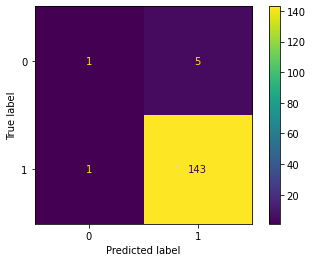

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot()

In [42]:
print(classification_report(table['True Value'], table['Prediction'], digits=3))

              precision    recall  f1-score   support

           0      0.500     0.167     0.250         6
           1      0.966     0.993     0.979       144

    accuracy                          0.960       150
   macro avg      0.733     0.580     0.615       150
weighted avg      0.948     0.960     0.950       150



In [43]:
table[table['True Value'] == 0]

,Prediction,True Value
52,0,0
64,1,0
101,1,0
105,1,0
131,1,0
149,1,0


In [44]:
new_xdata.iloc[0]

Age                            21.00
Financial Status                1.00
Has a Laptop                    2.00
Type of Internet Connection     1.00
CC100                           1.00
CC101                           1.75
CC102                           2.00
CS111/IT112                     2.00
English Prof                   83.47
Reading Compre                 66.85
Science Process                59.25
Quantitative                   53.82
Abstract                       72.90
CET OAPR                       76.98
SHS/HS GPA                     84.50
ABM/BAM                         0.00
GAS                             0.00
HUMSS                           0.00
STEM                            0.00
Sports Track                    0.00
TVL-HE                          0.00
TVL-ICT                         1.00
Female                          1.00
Male                            0.00
Prefer not to say               0.00
Name: 171, dtype: float64